In [13]:
#Import neccessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
# Load the dataset into a DataFrame
df = pd.read_csv('./post natal data.csv')

In [15]:
# Display the first few rows of the DataFrame
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [16]:
df.drop(columns=['Timestamp'],inplace=True) # Features (excluding 'Timestamp')

In [17]:
#df.describe()

In [18]:
df.fillna('Sometimes', inplace=True)

In [19]:
import pandas as pd

# Assuming df is your DataFrame
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()

Unique values for column 'Age':
['35-40' '40-45' '30-35' '45-50' '25-30']

Unique values for column 'Feeling sad or Tearful':
['Yes' 'No' 'Sometimes']

Unique values for column 'Irritable towards baby & partner':
['Yes' 'No' 'Sometimes']

Unique values for column 'Trouble sleeping at night':
['Two or more days a week' 'No' 'Yes']

Unique values for column 'Problems concentrating or making decision':
['Yes' 'No' 'Often' 'Sometimes']

Unique values for column 'Overeating or loss of appetite':
['Yes' 'No' 'Not at all']

Unique values for column 'Feeling anxious':
['Yes' 'No']

Unique values for column 'Feeling of guilt':
['No' 'Yes' 'Maybe' 'Sometimes']

Unique values for column 'Problems of bonding with baby':
['Yes' 'Sometimes' 'No']

Unique values for column 'Suicide attempt':
['Yes' 'No' 'Not interested to say']



In [20]:
#df.isnull() 

In [21]:
#df.isnull().count()

In [22]:
column_names = list(df.columns)
print(column_names)

['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']


In [23]:
#df.dtypes

In [24]:
# Get non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)

Non-Numeric Columns: Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')


In [25]:

from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder for each column
label_encoders = {}
label_mappings = {}

for column in non_numeric_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    label_encoders[column] = encoder
    label_mappings[column] = {label: encoded_label for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_))}

# Now, the non-numeric columns are converted to numeric using label encoding
df.head()

# Access label mappings for each column
for column, mapping in label_mappings.items():
    print(f"Label Mapping for column '{column}':")
    for label, encoded_label in mapping.items():
        print(f"{label}: {encoded_label}")


Label Mapping for column 'Age':
25-30: 0
30-35: 1
35-40: 2
40-45: 3
45-50: 4
Label Mapping for column 'Feeling sad or Tearful':
No: 0
Sometimes: 1
Yes: 2
Label Mapping for column 'Irritable towards baby & partner':
No: 0
Sometimes: 1
Yes: 2
Label Mapping for column 'Trouble sleeping at night':
No: 0
Two or more days a week: 1
Yes: 2
Label Mapping for column 'Problems concentrating or making decision':
No: 0
Often: 1
Sometimes: 2
Yes: 3
Label Mapping for column 'Overeating or loss of appetite':
No: 0
Not at all: 1
Yes: 2
Label Mapping for column 'Feeling anxious':
No: 0
Yes: 1
Label Mapping for column 'Feeling of guilt':
Maybe: 0
No: 1
Sometimes: 2
Yes: 3
Label Mapping for column 'Problems of bonding with baby':
No: 0
Sometimes: 1
Yes: 2
Label Mapping for column 'Suicide attempt':
No: 0
Not interested to say: 1
Yes: 2


In [26]:
#df.corr()

In [27]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Feeling anxious'].abs().sort_values(ascending=False)

In [28]:
# Define features and target variable
X = df.drop(columns=['Feeling anxious'])  
y = df['Feeling anxious']  # Target variable

In [29]:
#X.head()

In [30]:
#y.head()

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
# SVM optimization using GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_classifier = SVC(probability=True)
grid_search_svm = GridSearchCV(svm_classifier, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found for SVM
print("Best Parameters for SVM:", grid_search_svm.best_params_)

Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [33]:
# Fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

In [34]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [35]:
# Create a list of tuples containing classifier names and their corresponding instances
classifiers = [
    ('SVM', grid_search_svm.best_estimator_),  # Use the best SVM model from GridSearchCV
    ('Random Forest', rf_classifier)
]

In [36]:
# Train each classifier and evaluate its performance
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Accuracy: {accuracy}')

SVM Accuracy: 0.9735099337748344
Random Forest Accuracy: 0.9735099337748344


In [37]:
# Create a VotingClassifier with SVM and Random Forest
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

In [38]:
# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(C=100, probability=True)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [39]:
# Predictions using the ensemble model
ensemble_pred = voting_clf.predict(X_test)

In [40]:
# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

In [41]:
print(f'Ensemble Accuracy: {ensemble_accuracy}')

Ensemble Accuracy: 0.9735099337748344


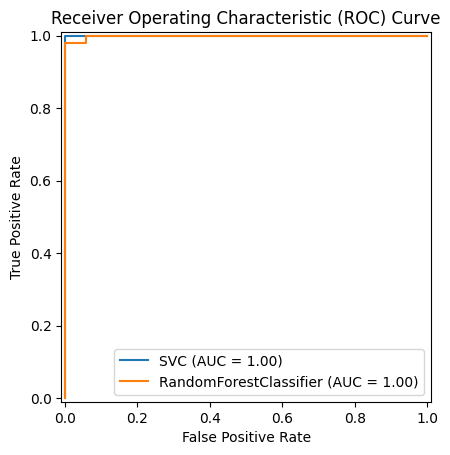

In [42]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
svc_disp = RocCurveDisplay.from_estimator(grid_search_svm.best_estimator_, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test, ax=svc_disp.ax_)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Train and save the model
import joblib

# Train your model
model = voting_clf

# Save the model to disk
joblib.dump(model, 'depression_model.pkl')


['depression_model.pkl']